In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, AUC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
# load the train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
# drop the 'id' column
train_df.drop(['id'], axis=1, inplace=True)
test_df.drop(['id'], axis=1, inplace=True)


In [4]:
# convert categorical variables to numeric form
le = LabelEncoder()
train_df['Gender'] = le.fit_transform(train_df['Gender'])
train_df['Vehicle_Age'] = le.fit_transform(train_df['Vehicle_Age'])
train_df['Vehicle_Damage'] = le.fit_transform(train_df['Vehicle_Damage'])

test_df['Gender'] = le.fit_transform(test_df['Gender'])
test_df['Vehicle_Age'] = le.fit_transform(test_df['Vehicle_Age'])
test_df['Vehicle_Damage'] = le.fit_transform(test_df['Vehicle_Damage'])


In [5]:
# scale numerical variables
scaler = StandardScaler()
train_df[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']] = scaler.fit_transform(train_df[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']])
test_df[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']] = scaler.transform(test_df[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']])


In [6]:
# split train data into train and validation
X = train_df.drop(['Response'], axis=1)
y = train_df['Response']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# define the deep learning model
model = Sequential([
    Dense(128, input_shape=(10,), activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


In [8]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=[BinaryAccuracy(), AUC()])


In [10]:
def data_generator(batch_size):
    while True:
        # Load a batch of data
        x_batch, y_batch = load_data_batch(batch_size)
        yield x_batch, y_batch

In [12]:
# train the model
#batch_size = 32
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/50
19056/19056 [==============================] - 128s 6ms/step - loss: 0.2760 - binary_accuracy: 0.8780 - auc: 0.8360 - val_loss: 0.2725 - val_binary_accuracy: 0.8751 - val_auc: 0.8505
Epoch 2/50
19056/19056 [==============================] - 114s 6ms/step - loss: 0.2737 - binary_accuracy: 0.8780 - auc: 0.8420 - val_loss: 0.2711 - val_binary_accuracy: 0.8751 - val_auc: 0.8528
Epoch 3/50
19056/19056 [==============================] - 109s 6ms/step - loss: 0.2735 - binary_accuracy: 0.8778 - auc: 0.8423 - val_loss: 0.2809 - val_binary_accuracy: 0.8751 - val_auc: 0.8485
Epoch 4/50
19056/19056 [==============================] - 116s 6ms/step - loss: 0.2742 - binary_accuracy: 0.8778 - auc: 0.8429 - val_loss: 0.2751 - val_binary_accuracy: 0.8751 - val_auc: 0.8515
Epoch 5/50
19056/19056 [==============================] - 114s 6ms/step - loss: 0.2750 - binary_accuracy: 0.8779 - auc: 0.8425 - val_loss: 0.2785 - val_binary_accuracy: 0.8751 - val_auc: 0.8516
Epoch 6/50
19056/19056 [======

19056/19056 [==============================] - 106s 6ms/step - loss: 0.2918 - binary_accuracy: 0.8779 - auc: 0.8399 - val_loss: 0.2779 - val_binary_accuracy: 0.8751 - val_auc: 0.8525
Epoch 44/50
19056/19056 [==============================] - 104s 5ms/step - loss: 0.2795 - binary_accuracy: 0.8780 - auc: 0.8404 - val_loss: 0.2750 - val_binary_accuracy: 0.8751 - val_auc: 0.8527
Epoch 45/50
19056/19056 [==============================] - 103s 5ms/step - loss: 0.2791 - binary_accuracy: 0.8780 - auc: 0.8405 - val_loss: 0.2776 - val_binary_accuracy: 0.8751 - val_auc: 0.8512
Epoch 46/50
19056/19056 [==============================] - 104s 5ms/step - loss: 0.2844 - binary_accuracy: 0.8779 - auc: 0.8401 - val_loss: 0.2746 - val_binary_accuracy: 0.8751 - val_auc: 0.8517
Epoch 47/50
19056/19056 [==============================] - 106s 6ms/step - loss: 0.3005 - binary_accuracy: 0.8779 - auc: 0.8396 - val_loss: 0.2787 - val_binary_accuracy: 0.8751 - val_auc: 0.8507
Epoch 48/50
19056/19056 [============

In [13]:
# evaluate the model on test data
X_test = test_df
X_test[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']] = scaler.transform(X_test[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']])
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


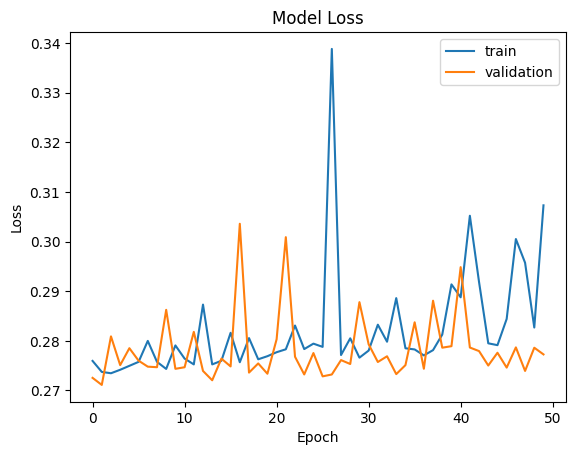

In [14]:
# plot the training and validation loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


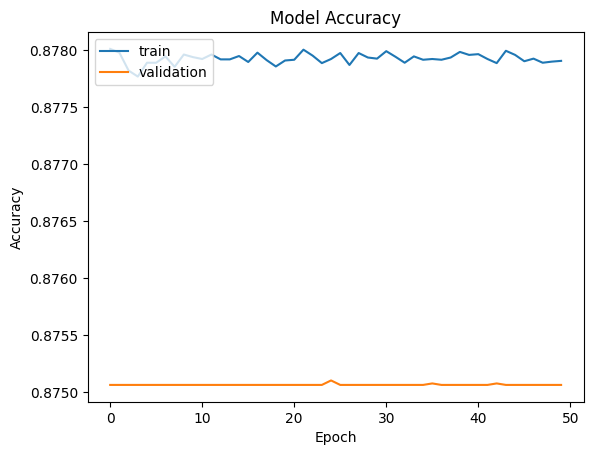

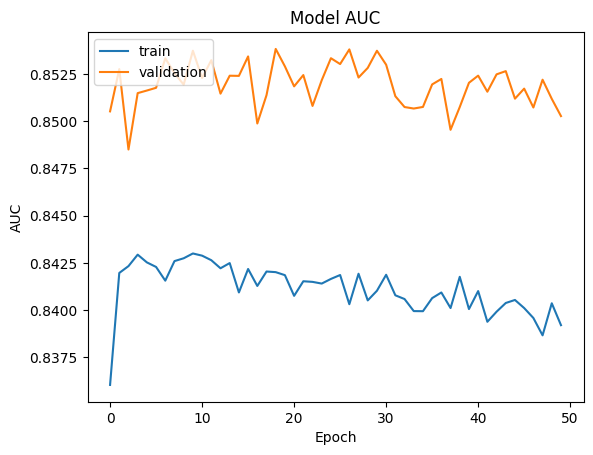

In [15]:
#plot the training and validation accuracy and AUC
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


C:\miniconda3\envs\py39tfkeras\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


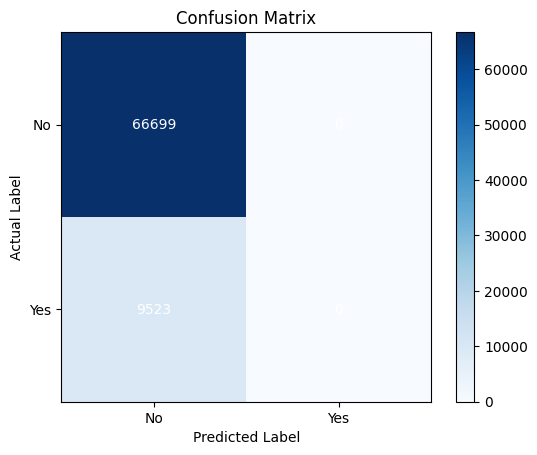

In [18]:
#plot the confusion matrix
cm = confusion_matrix(y_val, model.predict_classes(X_val))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')
plt.show()


C:\miniconda3\envs\py39tfkeras\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


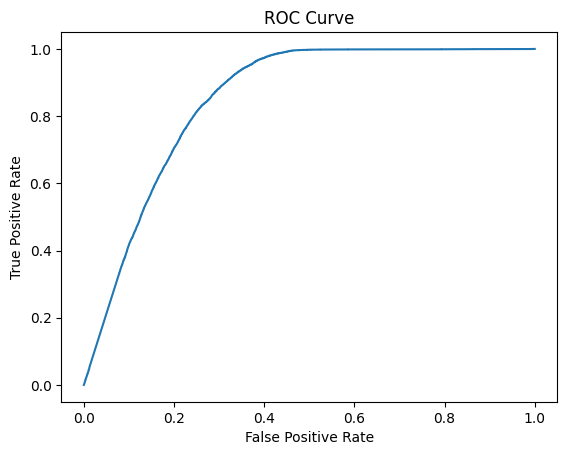

In [19]:
#plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [20]:
#calculate the AUC score on validation data
auc_score = roc_auc_score(y_val, model.predict_proba(X_val))
print('AUC Score on Validation Data: {:.4f}'.format(auc_score))


C:\miniconda3\envs\py39tfkeras\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


AUC Score on Validation Data: 0.8503
